In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from glob import glob

from sklearn.decomposition import TruncatedSVD, NMF
from utils import loadpkl, to_json

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:
# load feathers
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm_notebook(files, mininterval=60)], axis=1)

# split train & test
train_df = df[df['click_mode'].notnull()]
test_df = df[df['click_mode'].isnull()]

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [2]:
# load pkls
df = loadpkl('../features/plans.pkl')
queries = loadpkl('../features/queries.pkl')
profiles = loadpkl('../features/profiles.pkl')
#queries_pred = loadpkl('../features/queries_pred.pkl')

In [3]:
# merge
df = pd.merge(df, queries, on='sid', how='left')
df = pd.merge(df, profiles, on='pid', how='left')

del queries, profiles
gc.collect()

train_df = df[df['click_mode'].notnull()]

KeyError: 'click_mode'

In [18]:
profiles = profiles[['pid']+['profile_{}'.format(i) for i in range(0,66)]]
df = pd.merge(queries, profiles, on='pid', how='left')

In [5]:
train_df.sort_values('req_time')

,click_mode,index,pid,pid_count,plan_0_distance,plan_0_distance_eta_ratio,plan_0_eta,plan_0_price,plan_0_price_distance_ratio,plan_0_price_eta_ratio,...,queries_x_d_count,queries_x_o_count,queries_y_d_count,queries_y_o_count,req_time,sid,x_d,x_o,y_d,y_o
373318,5.0,373318,101467.0,396.0,923,1.074505,859,0,0.000000,0.000000,...,16082,18655,46675,39489,2018-10-01 00:00:10,753082,116.34,116.34,39.90,39.90
245839,9.0,245839,171074.0,27.0,35469,14.459437,2453,0,0.000000,0.000000,...,14120,3636,23584,35785,2018-10-01 00:00:11,756507,116.27,116.58,40.00,39.92
279209,7.0,279209,142228.0,26.0,16761,9.501701,1764,4600,0.274447,2.607710,...,44759,6739,59154,15112,2018-10-01 00:00:46,776916,116.39,116.51,39.91,39.87
27657,5.0,27657,106323.0,44.0,897,1.125471,797,0,0.000000,0.000000,...,19914,24366,23333,23294,2018-10-01 00:00:47,762813,116.35,116.35,39.98,39.98
487777,1.0,487777,108389.0,1.0,13909,2.763012,5034,300,0.021569,0.059595,...,44759,19475,59154,20412,2018-10-01 00:00:50,767905,116.39,116.43,39.91,39.97
326480,7.0,326480,102535.0,1.0,26242,12.274088,2138,0,0.000000,0.000000,...,44759,3249,59154,6682,2018-10-01 00:00:55,734837,116.39,116.57,39.91,40.01
424770,1.0,424770,207027.0,8.0,75216,15.559785,4834,0,0.000000,0.000000,...,4040,4575,4582,35785,2018-10-01 00:01:47,735700,116.00,116.25,40.35,39.92
278667,0.0,278667,NaN,NaN,13904,11.753170,1183,0,0.000000,0.000000,...,15928,21444,29645,35785,2018-10-01 00:02:04,782126,116.43,116.33,39.94,39.92
233075,4.0,233075,172900.0,352.0,17735,3.257117,5445,300,0.016916,0.055096,...,44759,5885,46675,36282,2018-10-01 00:02:23,773765,116.39,116.26,39.90,39.89
268317,1.0,268317,192310.0,655.0,25020,5.817252,4301,2500,0.099920,0.581260,...,13601,4857,32602,8721,2018-10-01 00:02:57,756028,116.47,116.59,39.93,40.08


In [5]:
df.columns.to_list()

['sid',
 'plan_0_distance',
 'plan_1_distance',
 'plan_2_distance',
 'plan_3_distance',
 'plan_4_distance',
 'plan_5_distance',
 'plan_6_distance',
 'plan_0_price',
 'plan_1_price',
 'plan_2_price',
 'plan_3_price',
 'plan_4_price',
 'plan_5_price',
 'plan_6_price',
 'plan_0_eta',
 'plan_1_eta',
 'plan_2_eta',
 'plan_3_eta',
 'plan_4_eta',
 'plan_5_eta',
 'plan_6_eta',
 'plan_0_transport_mode',
 'plan_1_transport_mode',
 'plan_2_transport_mode',
 'plan_3_transport_mode',
 'plan_4_transport_mode',
 'plan_5_transport_mode',
 'plan_6_transport_mode',
 'plan_time',
 'click_mode',
 'plan_weekday',
 'plan_hour',
 'plan_weekday_hour',
 'plan_time_diff',
 'plan_weekday_count',
 'plan_hour_count',
 'plan_weekday_hour_count',
 'plan_distance_mean',
 'plan_distance_sum',
 'plan_distance_max',
 'plan_distance_min',
 'plan_distance_var',
 'plan_distance_skew',
 'plan_price_mean',
 'plan_price_sum',
 'plan_price_max',
 'plan_price_min',
 'plan_price_var',
 'plan_price_skew',
 'plan_eta_mean',
 'plan

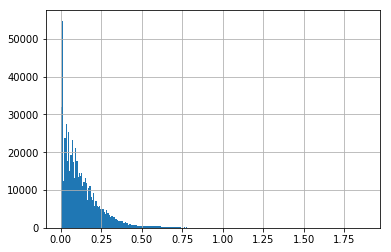

In [9]:
queries.queries_distance.hist(bins=255)

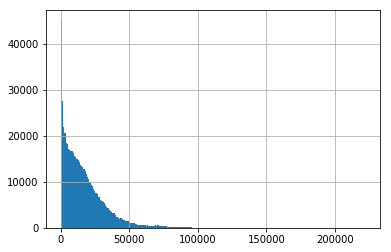

In [11]:
df.plan_1_distance.hist(bins=255)

In [6]:
# load csv & pkl
profiles = pd.read_csv('../input/data_set_phase1/profiles.csv')
queries = loadpkl('../features/queries.pkl')

In [9]:
df.dtypes[df.dtypes=='object']

plan_distance_max_plan                object
plan_distance_min_plan                object
plan_price_max_plan                   object
plan_price_min_plan                   object
plan_eta_max_plan                     object
plan_eta_min_plan                     object
plan_price_distance_ratio_max_plan    object
plan_price_eta_ratio_max_plan         object
plan_price_distance_ratio_min_plan    object
plan_price_eta_ratio_min_plan         object
plan_distance_eta_ratio_max_plan      object
plan_distance_eta_ratio_min_plan      object
plan_distance_ratio_0_max_plan        object
plan_distance_ratio_0_min_plan        object
plan_price_ratio_0_max_plan           object
plan_price_ratio_0_min_plan           object
plan_eta_ratio_0_max_plan             object
plan_eta_ratio_0_min_plan             object
dtype: object

In [16]:
df.dtypes

sid                                         int64
plan_0_distance                             int64
plan_1_distance                           float64
plan_2_distance                           float64
plan_3_distance                           float64
plan_4_distance                           float64
plan_5_distance                           float64
plan_6_distance                           float64
plan_0_price                                int64
plan_1_price                              float64
plan_2_price                              float64
plan_3_price                              float64
plan_4_price                              float64
plan_5_price                              float64
plan_6_price                              float64
plan_0_eta                                  int64
plan_1_eta                                float64
plan_2_eta                                float64
plan_3_eta                                float64
plan_4_eta                                float64


In [7]:
queries

,sid,pid,req_time,click_mode,x_o,y_o,x_d,y_d,queries_o_count,queries_d_count,queries_x_o_count,queries_y_o_count,queries_x_d_count,queries_y_d_count,queries_distance,queries_o_d_count,queries_weekday,queries_hour,queries_weekday_count,queries_hour_count
0,3000821,NaN,2018-11-02 17:54:30,9.0,116.29,39.97,116.32,39.96,1101,1046,15792,20412,37054,16937,0.031623,4,4,17,91118,43259
1,3085857,210736.0,2018-11-16 10:53:10,1.0,116.39,39.84,116.33,39.79,695,185,33319,12712,20339,4843,0.078102,1,4,10,91118,39921
2,2944522,NaN,2018-10-06 10:33:58,9.0,116.31,39.93,116.27,40.00,635,4633,27853,33989,14120,23584,0.080623,5,5,10,100748,39921
3,559931,202427.0,2018-11-23 14:54:11,1.0,116.27,39.88,116.39,39.90,363,8756,11881,15663,44759,46675,0.121655,9,4,14,91118,41918
4,2819352,172251.0,2018-10-30 11:48:41,7.0,116.34,39.96,116.37,39.86,1166,15545,18655,17994,35540,25996,0.104403,44,1,11,66301,40480
5,2754575,135606.0,2018-10-18 07:37:32,1.0,116.54,39.73,116.48,39.76,55,75,3515,2952,9440,4313,0.067082,1,3,7,82811,23773
6,2224795,189023.0,2018-11-20 14:34:03,1.0,116.34,39.73,116.79,40.35,312,12,18655,2952,159,4582,0.766094,1,1,14,66301,41918
7,1598541,156954.0,2018-10-03 09:19:47,1.0,116.26,40.22,116.24,40.22,350,745,5885,3308,3959,3294,0.020000,34,2,9,91688,39881
8,676316,135045.0,2018-11-15 15:25:52,5.0,116.39,39.91,116.39,39.90,3473,8756,33319,61527,44759,46675,0.010000,174,3,15,82811,42178
9,1068802,176605.0,2018-11-08 23:13:57,3.0,116.29,40.02,116.27,39.95,114,513,15792,4817,14120,18884,0.072801,1,3,23,82811,9343


In [10]:
profiles = profiles.merge(queries[['pid','click_mode', 'req_time']], on='pid', how='left')

In [14]:
profiles['is_test'] = (profiles['click_mode'].isnull()).astype(int)

In [39]:
profiles_dummies = pd.get_dummies(profiles.click_mode,dummy_na=True)

In [41]:
profiles_dummies.columns = [i for i in range(0,12)] + ['nan']
profiles_dummies['pid'] = profiles['pid']

In [43]:
profiles_dummies_group  = profiles_dummies.groupby('pid').count()
profiles_dummies_pid = profiles_dummies_group.index[profiles_dummies_group[0] > 1]

In [49]:
profiles_dummies = profiles_dummies.loc[profiles_dummies_pid.to_list(),:]

In [58]:
profiles.pid.map(profiles_dummies.groupby('pid').mean()[1]).fillna(0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
411826    0.0
411827    0.0
411828    0.0
411829    0.0
411830    0.0
411831    0.0
411832    0.0
411833    0.0
411834    0.0
411835    0.0
411836    0.0
411837    0.0
411838    0.0
411839    0.0
411840    0.0
411841    0.0
411842    0.0
411843    0.0
411844    0.0
411845    0.0
411846    0.0
411847    0.0
411848    0.0
411849    0.0
411850    0.0
411851    0.0
411852    0.0
411853    0.0
411854    0.0
411855    0.0
Name: pid, Length: 411856, dtype: float64

In [2]:
df = loadpkl('../features/queries_plans.pkl')

In [7]:
df.plan_distance_max_plan.astype(float)

0          9.0
1          7.0
2          7.0
3          7.0
4          7.0
5          1.0
6          7.0
7          1.0
8          1.0
9          7.0
10         1.0
11         3.0
12         3.0
13         1.0
14         3.0
15         1.0
16         9.0
17         3.0
18         7.0
19        10.0
20         9.0
21         7.0
22         9.0
23         9.0
24         3.0
25        10.0
26         9.0
27         2.0
28         5.0
29         9.0
          ... 
594328     1.0
594329     2.0
594330     3.0
594331     3.0
594332     7.0
594333     7.0
594334     9.0
594335     7.0
594336     3.0
594337     NaN
594338     1.0
594339     3.0
594340     2.0
594341     3.0
594342     3.0
594343     7.0
594344     7.0
594345     3.0
594346    10.0
594347     7.0
594348     3.0
594349     2.0
594350     3.0
594351     3.0
594352     NaN
594353     7.0
594354     1.0
594355     7.0
594356     7.0
594357     7.0
Name: plan_distance_max_plan, Length: 594358, dtype: float64